**City guard attendance analytics**

This notebook analyzes data of attendance of the guard of the city of Curitiba - Brazil from 2009 to 2018. The data are obtained in the site http://www.curitiba.pr.gov.br/dadosabertos and are open to anyone.

Reading the csv file:


In [1]:
import pandas as pd
        
df = pd.read_csv('data/2018-09-01_sigesguarda_-_Base_de_Dados_edit.csv', delimiter=";", error_bad_lines=False, encoding='ISO-8859-1')

df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,19,20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,...,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156
0,2009,CIDADE INDUSTRIAL,NaN,NÃO,NÃO,DAVI XAVIER DA SILVA,0,Alarmes,NaN,NaN,...,15:14:00,1,NaN,SIGA,CIC,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN
1,2009,FAZENDINHA,BOSQUE DA FAZENDINHA,SIM,NÃO,CARLOS KLEMTZ,0,Roubo,NaN,NaN,...,15:22:00,1,NaN,153,PORTÃO,SECRETARIA MUNICIPAL MEIO AMBIENTE,SMMA,NORMAL,NaN,NaN
2,2009,UBERABA,NaN,NÃO,NÃO,DOUTOR JOÃO DE PAULA MOURA BRITO,0,Animais,NaN,NaN,...,15:59:00,1,NaN,156,CAJURU,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640856.0
3,2009,SÍTIO CERCADO,NaN,NÃO,NÃO,EDGARD CAVALCANTI DE ALBUQUERQUE,0,Animais,NaN,NaN,...,16:13:00,1,NaN,156,BAIRRO NOVO,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640854.0
4,2009,TATUQUARA,CENTRO DE ESPORTE E LAZER SANTA RITA,SIM,NÃO,CARLOS MUNHOZ DA ROCHA,0,Alarmes,NaN,NaN,...,16:29:00,1,NaN,SIGA,PINHEIRINHO,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN


Top ten ocurrences types:

In [22]:
ocurrences_count = df["NATUREZA1_DESCRICAO"].value_counts()

ocurrences_count[0:10]




Apoio                     32471
Dano                      30738
Perturbação do sossego    18208
Roubo                     14162
Substância Ilícita        13651
Animais                   12806
Abordagem                 11540
Invasão                    9940
Alarmes                    9715
Atitude suspeita           8004
Name: NATUREZA1_DESCRICAO, dtype: int64

Top ten regions by ocurrences count:

In [23]:
regions_count = df["ATENDIMENTO_BAIRRO_NOME"].value_counts()

regions_count[0:10]

CENTRO               32528
CIDADE INDUSTRIAL    15590
SÍTIO CERCADO        13991
CAJURU               11127
BOQUEIRÃO            10387
SÃO FRANCISCO         6412
ALTO BOQUEIRÃO        5781
TATUQUARA             5178
CAPÃO RASO            5104
PORTÃO                5076
Name: ATENDIMENTO_BAIRRO_NOME, dtype: int64

Regions with the greatest number of drug-related occurrences:

In [21]:
drugs_df = df.loc[df['NATUREZA1_DESCRICAO'] == 'Substância Ilícita']

drugs_regions_count = drugs_df["ATENDIMENTO_BAIRRO_NOME"].value_counts()

drugs_regions_count[0:10]


CENTRO               4299
SÃO FRANCISCO        1569
SÍTIO CERCADO         786
CIDADE INDUSTRIAL     602
BACACHERI             400
SANTO INÁCIO          360
PORTÃO                349
BOQUEIRÃO             330
FAZENDINHA            278
ÁGUA VERDE            257
Name: ATENDIMENTO_BAIRRO_NOME, dtype: int64

Regions with the highest number of occurrences related to animals:

In [41]:
animals_df = df.loc[df['NATUREZA1_DESCRICAO'] == 'Animais']

animals_regions_count = animals_df["ATENDIMENTO_BAIRRO_NOME"].value_counts()

animals_regions_count[0:10]

df['NATUREZA1_DESCRICAO'].values

array(['Alarmes', 'Roubo', 'Animais', ..., 'Alarmes',
       'Perturbação do sossego', 'Roubo'], dtype=object)

Histogram of ocurrences: 

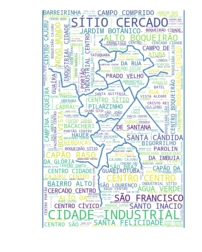

In [61]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.

np.savetxt('data\df2text.txt', df['ATENDIMENTO_BAIRRO_NOME'].values, fmt='%s')
text = open('data\df2text.txt').read()

# read the mask image
curitiba_mask = np.array(Image.open("data\curitiba_map.png"))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=curitiba_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file("wordcloud.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()